In [1]:
using Pkg
Pkg.add("Plots")
using Plots

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [2]:
function vdp_sun(du, u, p, t)
    # dx/dt
    du[1] = u[2]
    # dy/dt
    du[2] = mu * (1.0 - u[1]^2.0) * u[2] - u[1]
    du
end

vdp_sun (generic function with 1 method)

In [29]:
function df(t, u, u2)
    mu = 2
    du = mu * (1.0 - u^2.0) * u2 - u
    return du
end

# refefence: https://nemuneko-gensokyou.blog.ss-blog.jp/2015-04-14
function runge_kutta_2nd(t, x, x2, DT)
    i = 1
    for i in 2:N+1
        #k1 = df(t[i-1], x[i-1])
        kx2_1 = df(t[i-1], x[i-1], x2[i-1])
        kx1_1 = x2[i-1]
        #k2 = df(t[i-1]+DT/2.0, x[i-1]+k1*DT/2.0)
        kx2_2 = df(t[i-1]+DT/2.0, x[i-1]+kx1_1*DT/2.0, x2[i-1]+kx2_1*DT/2.0)
        kx1_2 = x2[i-1] + kx2_1/2.0
        #k3 = df(t[i-1]+DT/2.0, x[i-1]+k2*DT/2.0)
        kx2_3 = df(t[i-1]+DT/2.0, x[i-1]+kx1_2*DT/2.0, x2[i-1]+kx2_2*DT/2.0)
        kx1_3 = x2[i-1] + kx2_2/2.0
        #k4 = df(t[i-1]+DT, x[i-1]+k3*DT)
        kx2_4 = df(t[i-1]+DT, x[i-1]+kx1_3*DT/2.0, x2[i-1]+kx2_3*DT/2.0)
        kx1_4 = x2[i-1] + kx2_3
        x[i] = x[i-1] + (kx1_1 + 2*kx1_2 + 2*kx1_3 + kx1_4)*DT/6.0
        x2[i] = x2[i-1] + (kx2_1 + 2*kx2_2 + 2*kx2_3 + kx2_4)*DT/6.0
    end
end

runge_kutta_2nd (generic function with 1 method)

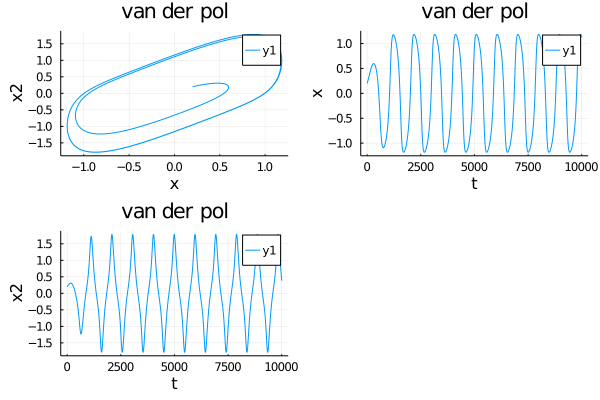

In [30]:
N = 10000

#df(ary, [1,2])
DT = 0.005
t = [i for i=1:N+1]
x = [0.2 for i = 1:N+1]
x2 = [0.2 for i = 1:N+1]
runge_kutta_2nd(t, x, x2, DT)
plt1 = plot(x, x2, xlabel="x",ylabel="x2",title="van der pol")
plt2 = plot(t, x,  xlabel="t",ylabel="x",title="van der pol")
plt3 = plot(t, x2,  xlabel="t",ylabel="x2",title="van der pol")
plot(plt1, plt2, plt3)

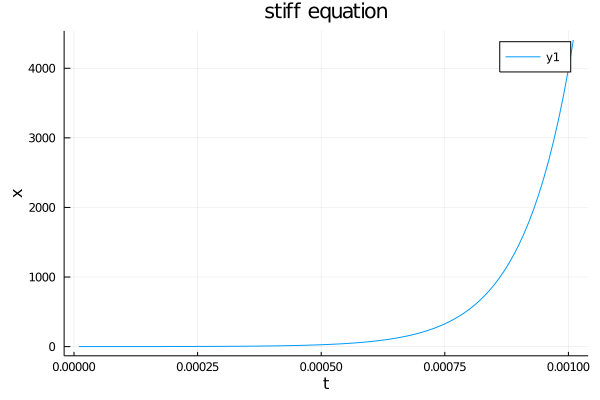

In [7]:
df(t, x) = 10^4 * x
function runge_kutta(t, x, DT)
    i = 1
    for i in 2:N+1
        k1 = df(t[i-1], x[i-1])
        k2 = df(t[i-1]+DT/2.0, x[i-1]+k1*DT/2.0)
        k3 = df(t[i-1]+DT/2.0, x[i-1]+k2*DT/2.0)
        k4 = df(t[i-1]+DT, x[i-1]+k3*DT)
        x[i] = x[i-1] + (k1 + 2*k2 + 2*k3 + k4)*DT/6.0
    end
end

N = 100
DT = 0.00001
t = [i*DT for i=1:N+1]
x = [0.2 for i=1:N+1]
runge_kutta(t, x, DT)
plt1 = plot(t, x,  xlabel="t",ylabel="x",title="stiff equation")
plot(plt1)
